In [19]:
# Plot of the Lorenz Attractor based on Edward Lorenz's 1963 "Deterministic
# Nonperiodic Flow" publication.
# http://journals.ametsoc.org/doi/abs/10.1175/1520-0469%281963%29020%3C0130%3ADNF%3E2.0.CO%3B2
#
# Note: Because this is a simple non-linear ODE, it would be more easily
#       done using SciPy's ode solver, but this approach depends only
#       upon NumPy.
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10


def lorenz(x, y, z, s=10, r=28, b=2+2.0/3.0):
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return x_dot, y_dot, z_dot

 The Lorenz Equations are a simplified three dimensional model for atmospheric convection; it has three parameters, and is a **system** of three ordinary differential equations
 
 $$
 x^\prime=s(y-x) \\
 y^\prime=rx-y-xz \\
 z^\prime=xy-bz
 $$

In [29]:
dt = 0.01
stepCnt = 1000

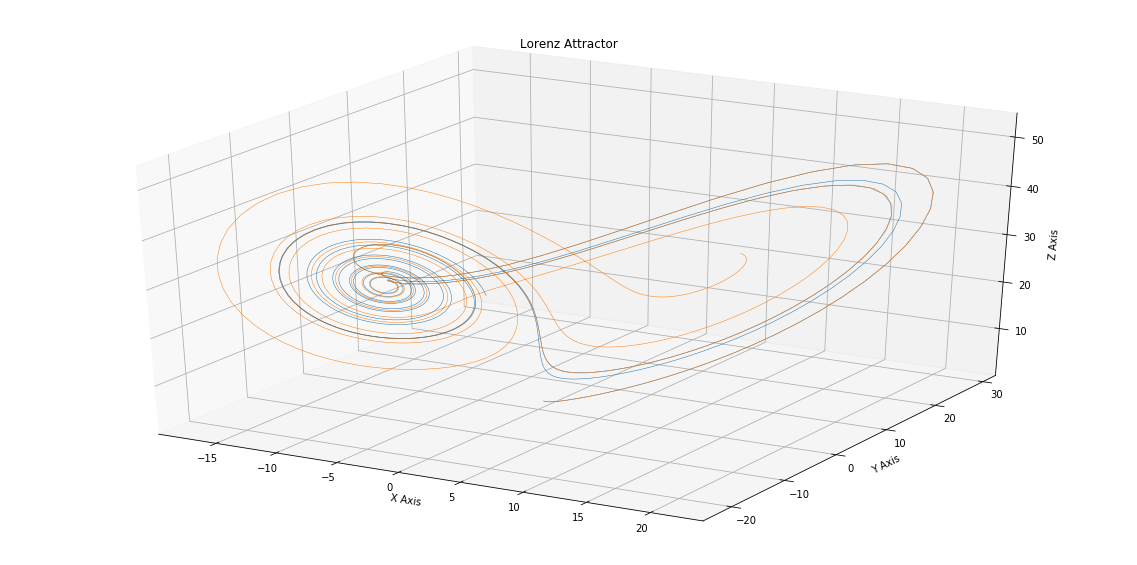

In [30]:
# Need one more for the initial values
xs = np.empty((stepCnt + 1,))
ys = np.empty((stepCnt + 1,))
zs = np.empty((stepCnt + 1,))
xp=np.copy(xs)
yp=np.copy(ys)
zp=np.copy(zs)

# Setting initial values
xs[0], ys[0], zs[0] = (0., 1., 1.05)
xp[0], yp[0], zp[0] = (1E-2,1.,1.05)

# Stepping through "time".
for i in range(stepCnt):
    # Derivatives of the X, Y, Z state
    x_dot, y_dot, z_dot = lorenz(xs[i], ys[i], zs[i])
    xs[i + 1] = xs[i] + (x_dot * dt)
    ys[i + 1] = ys[i] + (y_dot * dt)
    zs[i + 1] = zs[i] + (z_dot * dt)
    x_dot, y_dot, z_dot = lorenz(xp[i], yp[i], zp[i])
    xp[i + 1] = xp[i] + (x_dot * dt)
    yp[i + 1] = yp[i] + (y_dot * dt)
    zp[i + 1] = zp[i] + (z_dot * dt)

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(xs, ys, zs, lw=0.5)
ax.plot(xp, yp, zp, lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

plt.show()